# Домашнее задание по обработке изображений

## Задание 1
- Выбрать картинку
- Вырезать область
- Отразить её (по вертикали / горизонтали / обоим направлениям)
- Переставить цветовые каналы в обратном порядке
- Вставить обратно в исходный кадр
- Отобразить и сохранить результат

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Program Files\Python311\python.exe -m pip install --upgrade pip


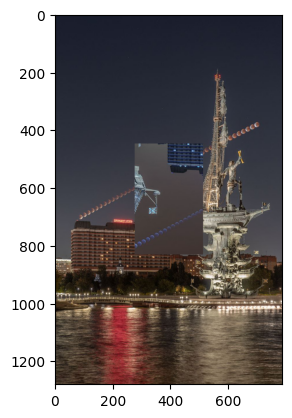

In [14]:
h, w = img_rgb.shape[:2]

roi_w = int(w * 0.3)
roi_h = int(h * 0.3)

cx, cy = w // 2, h // 2

x1 = max(0, cx - roi_w // 2)
y1 = max(0, cy - roi_h // 2)
x2 = min(w, x1 + roi_w)
y2 = min(h, y1 + roi_h)

roi = img_rgb[y1:y2, x1:x2]

roi_flip = cv2.flip(roi, -1)
roi_flip = roi_flip[:, :, ::-1]     # реверс каналов
result1 = img_rgb.copy()
result1[y1:y2, x1:x2] = roi_flip

plt.imshow(result1)

## Задание 2
- Взять произвольную картинку
- Разделить на 4 части (пополам по горизонтали и вертикали)
- Привести картинку к серой (одноканальной)
- Вставить в:
  - Левый верх: только R
  - Правый верх: только G
  - Левый низ: только B
  - Правый низ: усреднение (R+G+B)/3

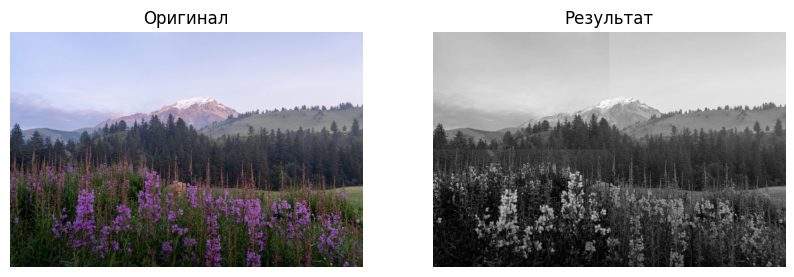

True

In [ ]:
img2 = cv2.imread('photo2.jpg')
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

h2, w2, _ = img2.shape
mid_h, mid_w = h2//2, w2//2

R, G, B = img2_rgb[:,:,0], img2_rgb[:,:,1], img2_rgb[:,:,2]
avg = ((R.astype(np.float32) + G.astype(np.float32) + B.astype(np.float32)) / 3).astype(np.uint8)

gray_result = np.zeros((h2, w2), dtype=np.uint8)

gray_result[:mid_h, :mid_w] = R[:mid_h, :mid_w]        # верхний левый
gray_result[:mid_h, mid_w:] = G[:mid_h, mid_w:]        # верхний правый
gray_result[mid_h:, :mid_w] = B[mid_h:, :mid_w]        # нижний левый
gray_result[mid_h:, mid_w:] = avg[mid_h:, mid_w:]      # нижний правый

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Оригинал")
plt.imshow(img2_rgb)
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Результат")
plt.imshow(gray_result, cmap='gray')
plt.axis('off')
plt.show()